<a href="https://colab.research.google.com/github/SBGuillermo/TFM-AnalisisComercio/blob/main/Notebooks/2_Analisis_cualitativo_datset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análisis cualititavo del dataset

vamos a anliazar los datos del data set para extraer conclusiones sobre cuando y en que cantidad se vende más

por limitaciones en el tamaño de un ùnico archivo de github tenemos que descargarnos dos tablas y unirlas

In [1]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sbn

Populating the interactive namespace from numpy and matplotlib


In [2]:
!wget https://raw.githubusercontent.com/SBGuillermo/TFM-AnalisisComercio/main/DataSet/DataClean/Table1.csv

--2021-07-06 08:13:09--  https://raw.githubusercontent.com/SBGuillermo/TFM-AnalisisComercio/main/DataSet/DataClean/Table1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17889332 (17M) [text/plain]
Saving to: ‘Table1.csv’

Table1.csv          100%[===================>]  17.06M  --.-KB/s    in 0.1s    

2021-07-06 08:13:09 (115 MB/s) - ‘Table1.csv’ saved [17889332/17889332]



In [3]:
!wget https://raw.githubusercontent.com/SBGuillermo/TFM-AnalisisComercio/main/DataSet/DataClean/Table2.csv

--2021-07-06 08:13:09--  https://raw.githubusercontent.com/SBGuillermo/TFM-AnalisisComercio/main/DataSet/DataClean/Table2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17784301 (17M) [text/plain]
Saving to: ‘Table2.csv’

Table2.csv          100%[===================>]  16.96M  --.-KB/s    in 0.1s    

2021-07-06 08:13:09 (116 MB/s) - ‘Table2.csv’ saved [17784301/17784301]



In [4]:
df1 = pd.read_csv('/content/Table1.csv')
df1

,Unnamed: 0,Unnamed: 0.1,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrecioTotal
0,0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,1,1,536365,71053,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,2,2,536365,84406B,other,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,3,3,536365,84029G,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,4,4,536365,84029E,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...
199995,199995,285947,561967,22400,other,3,2011-08-01 13:11:00,0.39,12844.0,United Kingdom,1.17
199996,199996,285948,561967,82482,WOODEN PICTURE FRAME WHITE FINISH,5,2011-08-01 13:11:00,2.55,12844.0,United Kingdom,12.75
199997,199997,285949,561967,82551,other,3,2011-08-01 13:11:00,1.45,12844.0,United Kingdom,4.35
199998,199998,285950,561967,82552,other,3,2011-08-01 13:11:00,1.45,12844.0,United Kingdom,4.35


In [5]:
df2 = pd.read_csv('/content/Table2.csv')
df2

,Unnamed: 0,Unnamed: 0.1,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrecioTotal
0,200000,285952,561967,23306,other,3,2011-08-01 13:11:00,1.45,12844.0,United Kingdom,4.35
1,200001,285953,561967,47504H,other,1,2011-08-01 13:11:00,0.79,12844.0,United Kingdom,0.79
2,200002,285954,561967,21907,other,6,2011-08-01 13:11:00,2.10,12844.0,United Kingdom,12.60
3,200003,285955,561967,21992,other,3,2011-08-01 13:11:00,1.25,12844.0,United Kingdom,3.75
4,200004,285956,561967,21754,other,2,2011-08-01 13:11:00,5.95,12844.0,United Kingdom,11.90
...,...,...,...,...,...,...,...,...,...,...,...
197919,397919,541904,581587,22613,other,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
197920,397920,541905,581587,22899,other,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
197921,397921,541906,581587,23254,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
197922,397922,541907,581587,23255,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [6]:
df = pd.concat([df1,df2], axis=0)
df

,Unnamed: 0,Unnamed: 0.1,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrecioTotal
0,0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,1,1,536365,71053,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,2,2,536365,84406B,other,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,3,3,536365,84029G,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,4,4,536365,84029E,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...
197919,397919,541904,581587,22613,other,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
197920,397920,541905,581587,22899,other,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
197921,397921,541906,581587,23254,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
197922,397922,541907,581587,23255,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [7]:
df = df.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrecioTotal
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,other,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
197919,581587,22613,other,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
197920,581587,22899,other,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
197921,581587,23254,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
197922,581587,23255,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [8]:
df4 = df

Para procesar los datos más adelante, dividimos la fecha de compra en dos columnas, una con el dia y otra con la hora

In [9]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["day"] = df["InvoiceDate"].dt.date
df["hour"] = df["InvoiceDate"].dt.time
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrecioTotal,day,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,08:26:00
1,536365,71053,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00
2,536365,84406B,other,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,08:26:00
3,536365,84029G,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00
4,536365,84029E,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00
...,...,...,...,...,...,...,...,...,...,...,...
197919,581587,22613,other,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12-09,12:50:00
197920,581587,22899,other,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12-09,12:50:00
197921,581587,23254,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09,12:50:00
197922,581587,23255,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09,12:50:00


In [10]:
df = df.drop(['InvoiceDate'], axis=1)

In [11]:
df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,PrecioTotal,day,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,15.30,2010-12-01,08:26:00
1,536365,71053,other,6,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00
2,536365,84406B,other,8,2.75,17850.0,United Kingdom,22.00,2010-12-01,08:26:00
3,536365,84029G,other,6,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00
4,536365,84029E,other,6,3.39,17850.0,United Kingdom,20.34,2010-12-01,08:26:00
...,...,...,...,...,...,...,...,...,...,...
197919,581587,22613,other,12,0.85,12680.0,France,10.20,2011-12-09,12:50:00
197920,581587,22899,other,6,2.10,12680.0,France,12.60,2011-12-09,12:50:00
197921,581587,23254,other,4,4.15,12680.0,France,16.60,2011-12-09,12:50:00
197922,581587,23255,other,4,4.15,12680.0,France,16.60,2011-12-09,12:50:00


## Análisis de los meses y horas de máxima compra

una vez tenemos todos los datos procesados, crearemos representaciones gráficas de esos datos

In [12]:
mx_time = df.drop(['StockCode','Description','Quantity','UnitPrice','Country','CustomerID','PrecioTotal', 'day'], axis=1)
mx_time

,InvoiceNo,hour
0,536365,08:26:00
1,536365,08:26:00
2,536365,08:26:00
3,536365,08:26:00
4,536365,08:26:00
...,...,...
197919,581587,12:50:00
197920,581587,12:50:00
197921,581587,12:50:00
197922,581587,12:50:00


In [13]:
mx_time_gb = mx_time.groupby('hour').count()
mx_time_gb

,InvoiceNo
hour,
06:20:00,1
07:35:00,43
07:36:00,27
07:37:00,26
07:38:00,23
...,...
20:09:00,137
20:12:00,66
20:13:00,125


In [14]:
sbn.set(rc={'figure.figsize':(10, 5)})

Text(0, 0.5, 'numbers of items sold')

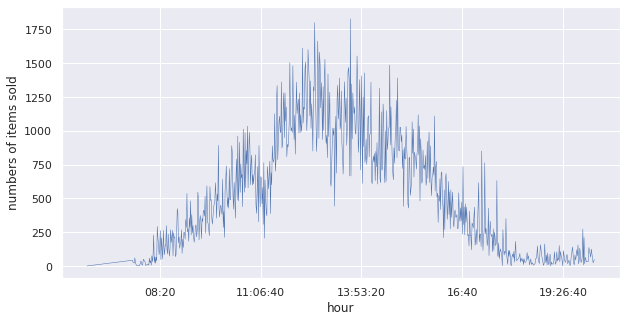

In [15]:
mx_time_gb['InvoiceNo'].plot(linewidth=0.5)
plt.ylabel('numbers of items sold')

el resultado de la grafica es demasiado confuso como para na buena interpretación, por lo que crearemos una tabla nueva donde solo tendremos en cuenta la hora (sin minutos) y el año y el mes

In [16]:
df4["InvoiceDate"] = pd.to_datetime(df4["InvoiceDate"])
df4["date"] = df4["InvoiceDate"].dt.strftime("%Y-%m")
df4["month"] = df4["InvoiceDate"].dt.strftime("%m")
df4["year"] = df4["InvoiceDate"].dt.strftime("%Y")
df4["hour"] = df4["InvoiceDate"].dt.strftime("%H")
df4

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,PrecioTotal,day,hour,date,month,year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,08,2010-12,12,2010
1,536365,71053,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08,2010-12,12,2010
2,536365,84406B,other,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,08,2010-12,12,2010
3,536365,84029G,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08,2010-12,12,2010
4,536365,84029E,other,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,08,2010-12,12,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197919,581587,22613,other,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12-09,12,2011-12,12,2011
197920,581587,22899,other,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12-09,12,2011-12,12,2011
197921,581587,23254,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09,12,2011-12,12,2011
197922,581587,23255,other,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-09,12,2011-12,12,2011


In [17]:
mx_time2 = df4.drop(['StockCode','Description','Quantity','UnitPrice','Country','CustomerID','InvoiceDate', 'day'], axis=1)
mx_time2

,InvoiceNo,PrecioTotal,hour,date,month,year
0,536365,15.30,08,2010-12,12,2010
1,536365,20.34,08,2010-12,12,2010
2,536365,22.00,08,2010-12,12,2010
3,536365,20.34,08,2010-12,12,2010
4,536365,20.34,08,2010-12,12,2010
...,...,...,...,...,...,...
197919,581587,10.20,12,2011-12,12,2011
197920,581587,12.60,12,2011-12,12,2011
197921,581587,16.60,12,2011-12,12,2011
197922,581587,16.60,12,2011-12,12,2011


In [18]:
mx_time_gb2 = mx_time2.groupby(['hour','date', 'month', 'year', 'PrecioTotal'], as_index=False).count()
mx_time_gb2

,hour,date,month,year,PrecioTotal,InvoiceNo
0,06,2011-08,08,2011,4.25,1
1,07,2010-12,12,2010,13.60,1
2,07,2010-12,12,2010,15.00,2
3,07,2010-12,12,2010,30.00,1
4,07,2010-12,12,2010,30.60,1
...,...,...,...,...,...,...
49403,20,2011-12,12,2011,3.75,1
49404,20,2011-12,12,2011,4.95,2
49405,20,2011-12,12,2011,5.75,1
49406,20,2011-12,12,2011,8.25,1


Text(0.5, 0, 'hour')

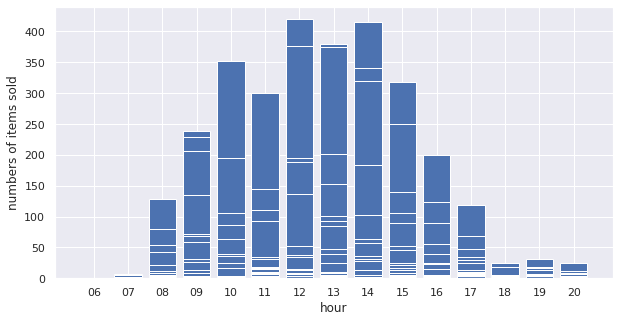

In [19]:
plt.bar(mx_time_gb2.hour, mx_time_gb2.InvoiceNo )
plt.ylabel('numbers of items sold')
plt.xlabel('hour')

Text(0.5, 0, 'month')

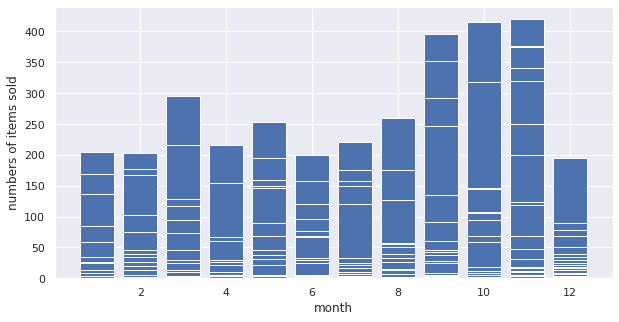

In [20]:
plt.bar(mx_time_gb2.month.astype('int'), mx_time_gb2.InvoiceNo )
plt.ylabel('numbers of items sold')
plt.xlabel('month')

## Comparación entre el precio de la compra y el número de objetos vendidos

In [21]:
inc_year_money = mx_time2.groupby('year', as_index=False).sum()
inc_year_money = inc_year_money.drop(['InvoiceNo'], axis=1)
inc_year_money

,year,PrecioTotal
0,2010,5.727139e+05
1,2011,8.338694e+06


In [22]:
inc_year_obj = mx_time_gb2.groupby('year', as_index=False).sum()
inc_year_obj = inc_year_obj.drop(['PrecioTotal'], axis=1)
inc_year_obj

,year,InvoiceNo
0,2010,26160
1,2011,371764


In [23]:
inc_year = pd.merge(inc_year_money, inc_year_obj, on='year')
inc_year

,year,PrecioTotal,InvoiceNo
0,2010,5.727139e+05,26160
1,2011,8.338694e+06,371764


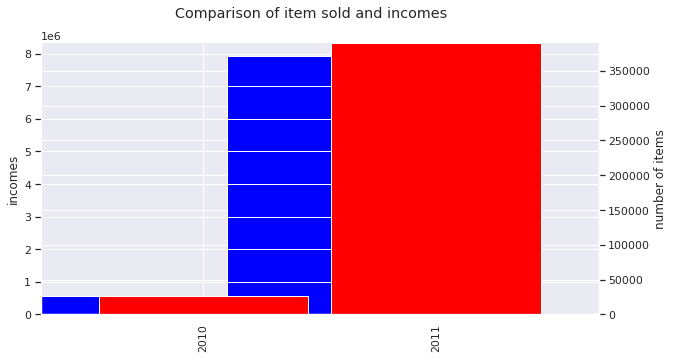

In [70]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

inc_year.InvoiceNo.plot(kind='bar', ax=ax1, width= 0.9, color= 'blue',position=1)
inc_year.PrecioTotal.plot(kind='bar', ax=ax2, width= 0.9, color='red')

ax2.set_ylim(0, 8.338694e+06)
ax1.yaxis.set_label_position('right')
ax1.yaxis.tick_right()
ax2.yaxis.set_label_position('left')
ax2.yaxis.tick_left()
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

fig.suptitle('Comparison of item sold and incomes')
ax2.set_ylabel('incomes')
ax1.set_ylabel('number of items')
ax1.set_xticklabels(['2010','2011'])

plt.show()


* No se pueden comparar los beneficios de ambos años ya que no disponemos de todos los datos del año 2010

## Conclusiones